In [1]:
import numpy as np
import pandas as pd

In [4]:
# read the large csv file with specified chunksize 
#df_chunk = pd.read_csv('../data/btc_final.csv', chunksize=50000)

df_chunk = pd.read_csv('/home/fabian/Documents/Repos/crypto_volatility/data/btc_final.csv', chunksize=50000)

In [5]:
chunk_list = []  # append each chunk df here 

# Each chunk is in df format
for chunk in df_chunk:  
    # (optional) --> perform data filtering 
    #chunk_filter = chunk_preprocessing(chunk)
    
    # Once the data filtering is done, append the chunk to list
    chunk_list.append(chunk)
    
# concat the list into dataframe 
df = pd.concat(chunk_list)

In [6]:
df.columns

Index(['has_media', 'hashtags', 'img_urls', 'is_replied', 'is_reply_to',
       'likes', 'links', 'parent_tweet_id', 'replies', 'reply_to_users',
       'retweets', 'screen_name', 'text', 'text_html', 'timestamp',
       'timestamp_epochs', 'tweet_id', 'tweet_url', 'user_id', 'username',
       'video_url', 'neg', 'neu', 'pos', 'compound', 'date', 'Bitcoin', 'BTC',
       'isPartial', 'date_vcrix', 'vcrix', 'vcrix_log_diff'],
      dtype='object')

## Modeling

In [2]:
%pwd

'/home/fabian/Documents/Repos/DEDA_class_2020SS/DEDA_2020SS_Crypto_Volatility/CV07_Modeling'

In [3]:
ts_vcrix = pd.read_csv("../data/Market/vcrix.csv", index_col='date')

In [4]:
ts_vcrix

,vcrix
date,
2020-01-01,564.354535
2020-01-02,560.908175
2020-01-03,558.592397
2020-01-04,574.417128
2020-01-05,615.550024
...,...
2020-05-27,873.952874
2020-05-28,871.938590
2020-05-29,900.197688


In [5]:
from statsmodels.tsa.ar_model import AR

#create train/test datasets
X = ts_vcrix['vcrix'].dropna()
train_data = X[1:len(X)-12]
test_data = X[X[len(X)-12:]]

#train the autoregression model
model = AR(train_data)
model_fitted = model.fit()

/home/fabian/anaconda3/envs/NS/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'


In [6]:
print('The lag value chose is: %s' % model_fitted.k_ar)
print('The coefficients of the model are:\n %s' % model_fitted.params)

The lag value chose is: 13
The coefficients of the model are:
 const        61.259664
L1.vcrix      0.942456
L2.vcrix      0.027672
L3.vcrix     -0.021228
L4.vcrix      0.080977
L5.vcrix     -0.053875
L6.vcrix     -0.022010
L7.vcrix      0.078944
L8.vcrix     -0.096476
L9.vcrix      0.004683
L10.vcrix     0.041304
L11.vcrix     0.025171
L12.vcrix    -0.038432
L13.vcrix    -0.025087
dtype: float64


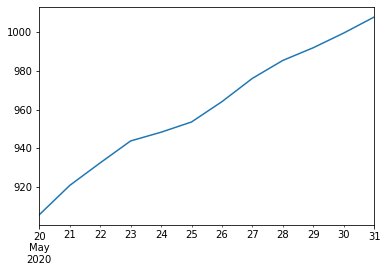

In [8]:
# make predictions 
predictions = model_fitted.predict(
    start=len(train_data), 
    end=len(train_data) + len(test_data)-1, 
    dynamic=False)

#plot the two values
predictions.plot()

In [10]:
from sklearn.metrics import r2_score

r2 = r2_score(ts_vcrix['vcrix'].tail(12), predictions)

NameError: name 'df' is not defined